# Project Name : Drinking Water Potability Prediction using ML and H2O Auto ML

## Context :
Access to safe drinking water is essential to health, a basic human right, 
and a component of effective policy for health protection. This is important 
as a health and development issue at a national, regional, and local level. 
In some regions, it has been shown that investments in water supply and 
sanitation can yield a net economic benefit, since the reductions in adverse health effects 
and health care costs outweigh the costs of undertaking the interventions.

### The drinkingwaterpotability.csv file contains water quality metrics for 3276 different water bodies

## Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML

## Step 1 : Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df_data = pd.read_csv("drinking_water_potability.csv")


In [4]:
df_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df_data.shape

(3276, 10)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df_data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

## Step 2 : DataAnalysis

In [8]:
df_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
df_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
null =['ph','Sulfate','Trihalomethanes']

C:\Users\mansi\AppData\Local\Temp\ipykernel_8196\1238186898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data.ph)


<Axes: xlabel='ph', ylabel='Density'>

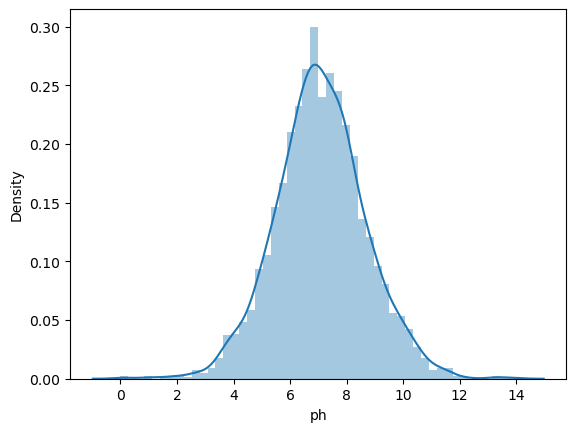

In [12]:
sns.distplot(df_data.ph)

In [13]:
df_data['ph'] = df_data['ph'].replace(np.nan, df_data.ph.mean())

In [ ]:
sns.distplot(df_data.Sulfate)

In [ ]:
df_data['Sulfate'] = df_data['Sulfate'].replace(np.nan, df_data.Sulfate.mean())

In [ ]:
sns.distplot(df_data.Trihalomethanes)

In [ ]:
df_data['Trihalomethanes'] = df_data['Trihalomethanes'].replace(np.nan, df_data.Trihalomethanes.mean())

In [ ]:
df_data.isnull().sum()

In [ ]:
sns.pairplot(data=df_data,hue='Potability')

In [ ]:
for column in df_data.columns:
    plt.figure()
    df_data.boxplot([column])

In [ ]:
df_data.corr()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_data.corr(),annot=True, vmax=1.0, vmin=-1.0)

## STEP 3 : Feature Engineering

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
x = df_data.drop(['Potability'],axis=1)
y =df_data.Potability

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [ ]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)

In [ ]:
print(Ext.feature_importances_)

In [ ]:
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [ ]:
df_data.head()

### Let us Standardize our data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()

In [ ]:
scaled= scale.fit_transform(x)

In [ ]:
scaled_df = pd.DataFrame(scaled,columns= x.columns)
scaled_df.head()

### Our data is ready for model building

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Model Development

### We will use the following models:
- Logistic Regression
- SVM
- Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, 
                             confusion_matrix,
                             classification_report, 
                             roc_auc_score)

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

## Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat)*100)
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

## Random Forest


In [ ]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123, n_estimators=1000)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

In [ ]:
feature = pd.Series(rf.feature_importances_,index=X_train.columns)
feature.sort_values(ascending=True).nlargest(X_train.shape[1]).plot(kind='barh')

In [ ]:
!pip install requests
!pip install tabulate

In [ ]:
!pip install "colorama >=0.3.8"
!pip install future

In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init(max_mem_size='8G')